In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set = train_set.drop('PassengerId',axis=1)
test_set = test_set.drop('PassengerId',axis=1)

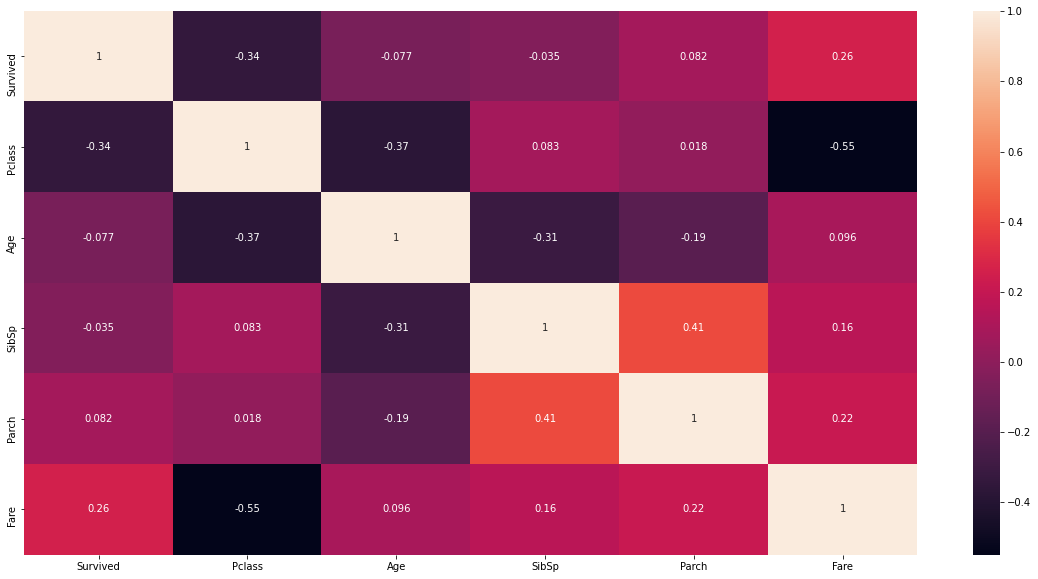

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(train_set.corr(), annot=True)
plt.show()

In [5]:
#Removing SibSp because it has low correlation with survived

train_set = train_set.drop('Name',axis=1)
train_set = train_set.drop('Ticket',axis=1)
train_set = train_set.drop('Cabin',axis=1)

test_set = test_set.drop('Name',axis=1)
test_set = test_set.drop('Ticket',axis=1)
test_set = test_set.drop('Cabin',axis=1)

In [6]:
train_set.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
test_set.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [8]:
train_set.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

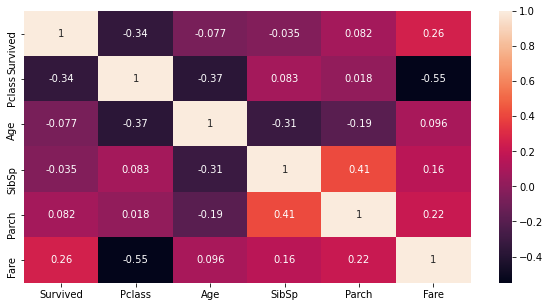

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(train_set.corr(), annot=True)
plt.show()

In [10]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Splitting dataset
x_train = train_set.iloc[:,1:].values
y_train = train_set.iloc[:,0:1].values

x_test = test_set.iloc[:,:].values

In [12]:
#Filling missing data

from sklearn.impute import SimpleImputer as SI,KNNImputer as KNN

imputer_age = KNN(n_neighbors=5, weights='uniform')
x_train[:,2:3] = imputer_age.fit_transform(x_train[:,2:3])
x_test[:,2:3] = imputer_age.transform(x_test[:,2:3])

imputer_fare = SI(missing_values=np.nan, strategy='median')
x_train[:,5:6] = imputer_fare.fit_transform(x_train[:,5:6]) 
x_test[:,5:6] = imputer_fare.transform(x_test[:,5:6])

imputer_embarked = SI(missing_values=np.nan, strategy='most_frequent')
x_train[:,6:7] = imputer_embarked.fit_transform(x_train[:,6:7])
x_test[:,6:7] = imputer_embarked.transform(x_test[:,6:7])

In [13]:
#Scaling
#fare
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,5:6] =sc.fit_transform(x_train[:,5:6])
x_test[:,5:6] =sc.transform(x_test[:,5:6])

#age
x_train[:,2:3] =sc.fit_transform(x_train[:,2:3])
x_test[:,2:3] =sc.transform(x_test[:,2:3])

#sibsp
x_train[:,3:4] =sc.fit_transform(x_train[:,3:4])
x_test[:,3:4] =sc.transform(x_test[:,3:4])

#parch
x_train[:, 4:5] = sc.fit_transform(x_train[:, 4:5]) #embarked
x_test[:, 4:5] = sc.transform(x_test[:, 4:5])

In [14]:
#Encoding 
#Pclass
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train[:,0] = le.fit_transform(x_train[:,0])
x_test[:,0]= le.transform(x_test[:,0])

In [15]:
#Encoding
#Embarked
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')
x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)

In [16]:
x_train = x_train[:,1:]
x_test = x_test[:,1:]

In [17]:
#Encoding
#Sex
ct1 = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x_train=ct1.fit_transform(x_train)
x_test=ct1.transform(x_test)

In [18]:
x_train = x_train[:,1:]
x_test = x_test[:,1:]

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=5,min_samples_split=7, n_estimators= 100)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
pred_train=classifier.predict(x_train)

In [21]:
#for training set
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, pred_train)
print(cm)
accuracy_score(y_train, pred_train)

[[519  30]
 [ 88 254]]


0.867564534231201

In [22]:
#for training set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train.ravel(), cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.17 %
Standard Deviation: 5.73 %


In [23]:
results=classifier.predict(x_test)

In [24]:
gender_dataset = pd.read_csv("gender_submission.csv")
gender_dataset

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
output = pd.DataFrame({'PassengerId': gender_dataset.PassengerId, 'Survived': results})
output.to_csv('my_submission.csv', index=False)